In [1]:
import requests
import json
import csv
import numpy as np
import pandas as pd

In [2]:
# Collecting stock data of Adobe using Alpha Vantage API
CSV_URL ="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ADBE&apikey=NR8HXOOB06DUO2M3&datatype=csv&outputsize=full"
with requests.Session() as s:
    download = s.get(CSV_URL)
    print(download)
    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    df = pd.DataFrame(cr)
df
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
df

<Response [200]>


,timestamp,open,high,low,close,volume
1,2020-04-27,348.8000,349.9600,345.1200,348.5000,2361714
2,2020-04-24,338.0000,344.7000,333.5011,344.1000,2146162
3,2020-04-23,338.9000,341.7500,334.8000,335.3700,2120251
4,2020-04-22,337.4100,339.3800,332.8006,336.7700,2231819
5,2020-04-21,340.9000,342.7630,325.2100,328.9900,3548202
...,...,...,...,...,...,...
5028,2000-05-02,128.6000,128.8000,115.3000,115.5000,1736700
5029,2000-05-01,122.2000,131.0000,122.1000,130.7000,2012300
5030,2000-04-28,124.8000,127.9000,118.0000,120.9000,2832200
5031,2000-04-27,108.1000,124.5000,107.0000,123.4000,2784800


In [3]:
# Data Type of the columns
dataTypeOfColumns = df.dtypes
print(dataTypeOfColumns)

0
timestamp    object
open         object
high         object
low          object
close        object
volume       object
dtype: object


In [4]:
# Checking if columns are unique column
columns = list(df)
for i in columns:
    print(i , "-", df[i].nunique() == df[i].count())

timestamp - True
open - False
high - False
low - False
close - False
volume - False


In [5]:
# Finding if there is any NaN value
df.isnull().values.any()

False

In [6]:
# Updating Datatypes of the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.open=df.open.astype(float)
df.high=df.high.astype(float)
df.low=df.low.astype(float)
df.close=df.close.astype(float)
df.volume=df.volume.astype(int)
df.dtypes

0
timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [7]:
df['average_value'] = df[['high', 'low']].mean(axis=1)
df

,timestamp,open,high,low,close,volume,average_value
1,2020-04-27,348.80,349.960,345.1200,348.50,2361714,347.54000
2,2020-04-24,338.00,344.700,333.5011,344.10,2146162,339.10055
3,2020-04-23,338.90,341.750,334.8000,335.37,2120251,338.27500
4,2020-04-22,337.41,339.380,332.8006,336.77,2231819,336.09030
5,2020-04-21,340.90,342.763,325.2100,328.99,3548202,333.98650
...,...,...,...,...,...,...,...
5028,2000-05-02,128.60,128.800,115.3000,115.50,1736700,122.05000
5029,2000-05-01,122.20,131.000,122.1000,130.70,2012300,126.55000
5030,2000-04-28,124.80,127.900,118.0000,120.90,2832200,122.95000
5031,2000-04-27,108.10,124.500,107.0000,123.40,2784800,115.75000


In [8]:
# Rearranging Columns
column_titles = ['timestamp','open','high','average_value','low','close','volume']
df.reindex(columns = column_titles)

,timestamp,open,high,average_value,low,close,volume
1,2020-04-27,348.80,349.960,347.54000,345.1200,348.50,2361714
2,2020-04-24,338.00,344.700,339.10055,333.5011,344.10,2146162
3,2020-04-23,338.90,341.750,338.27500,334.8000,335.37,2120251
4,2020-04-22,337.41,339.380,336.09030,332.8006,336.77,2231819
5,2020-04-21,340.90,342.763,333.98650,325.2100,328.99,3548202
...,...,...,...,...,...,...,...
5028,2000-05-02,128.60,128.800,122.05000,115.3000,115.50,1736700
5029,2000-05-01,122.20,131.000,126.55000,122.1000,130.70,2012300
5030,2000-04-28,124.80,127.900,122.95000,118.0000,120.90,2832200
5031,2000-04-27,108.10,124.500,115.75000,107.0000,123.40,2784800


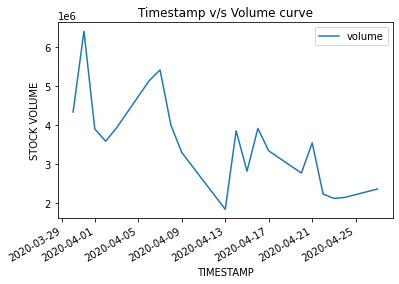

In [9]:
# Plotting curve TimeStamp v/s Volume
import matplotlib.pyplot as plt

df_updated = df.head(20)
df_updated.plot(kind='line',x = "timestamp",y = "volume")
plt.title('Timestamp v/s Volume curve')
plt.xlabel('TIMESTAMP')
plt.ylabel('STOCK VOLUME')
plt.show()

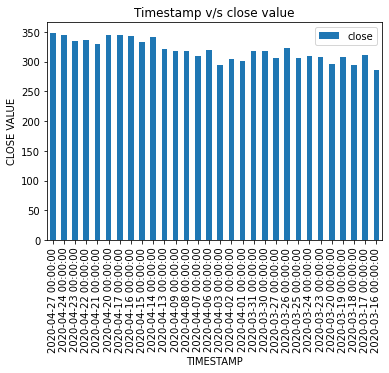

In [10]:
# Plotting Bar Graph between TimeStamp and Close Value
import matplotlib.pyplot as plt

df_updated = df.head(30)

df_updated.plot(kind='bar',x = "timestamp",y = "close")
plt.title('Timestamp v/s close value')
plt.xlabel('TIMESTAMP')
plt.ylabel('CLOSE VALUE')
plt.show()


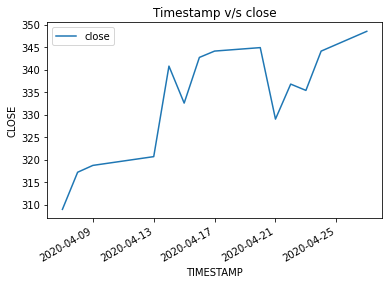

In [11]:
# Plotting curve TimeStamp v/s Close Value
df_updated = df.head(14)
df_updated.plot(kind='line',x = "timestamp",y = "close")
plt.title('Timestamp v/s close')
plt.xlabel('TIMESTAMP')
plt.ylabel('CLOSE')
plt.show()

In [12]:
# importing dependencies
from sklearn.svm import SVR 
%matplotlib inline

In [13]:
# Get data function
def get_data(df):  
    df.timestamp = df.timestamp.astype(str)
    data = df.copy()
    data['timestamp'] = data['timestamp'].str.split('-').str[2]
    data['timestamp'] = pd.to_numeric(data['timestamp'])
    return [ data['timestamp'].tolist(), data['close'].tolist() ] 
# Convert Series to list
dates, prices = get_data(df_updated)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
# Use three models: linear, polynomial and radial basic function (default kernal for SVR)
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=4)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.5)
    
    # Fit regression model
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

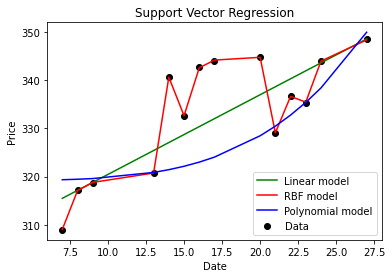

(348.4001955092228, 348.60000000012303, 349.9899665829195)


In [15]:
predicted_price = predict_prices(dates, prices, [27])
print(predicted_price)

In [16]:
predicted_price = list(predicted_price)
print(predicted_price)

[348.4001955092228, 348.60000000012303, 349.9899665829195]


In [17]:
# Calculating Root Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
actual_value = df['close'].at[1]
type(actual_value)
actual_value = actual_value.item()
# Actual Value till date
print('Actual Value: ', actual_value)
# Predicted_Value from Linear Regression model
predicted_value_RBFRegression = predicted_price[0]
predicted_value_linearRegression = predicted_price[1]
predicted_value_polynomial = predicted_price[2]
print('Predicted value from Radical Basic Model: ', predicted_value_RBFRegression)
print('Predicted value from Linear Regression Model: ', predicted_value_linearRegression)
print('Predicted value from Polynomial Model: ', predicted_value_polynomial)
actual_value1 = []
actual_value1.append(actual_value)
predicted_value1 = []
predicted_value1.append(predicted_value_linearRegression)
# Mean Square Error
mse = mean_squared_error(actual_value1, predicted_value1)
rmse = sqrt(mse)
print("Root Mean Square Error value: ", rmse)

Actual Value:  348.5
Predicted value from Radical Basic Model:  348.4001955092228
Predicted value from Linear Regression Model:  348.60000000012303
Predicted value from Polynomial Model:  349.9899665829195
Root Mean Square Error value:  0.1000000001230319


In [18]:
# The results shows that all the three models provides very close results to the actual value,
# when we do analysis on the last 15days data, 
# This proves Support Vector Regression method models provides very good accuracy and least root mean square values.